# Project 1
Noli Angeles
9/27/23

## Intro to the Data Set and Objectives
We're going to be working on the "Employee Productivity and Satisfaction HR Data" created by ADITYA ATREYA on kaggle. There are 200 observations and 11 variables. The variables are all self-explanatory. My goal is to identify the following:

1) Understand what factors contribute to employee job satisfaction

as well as 

2) Any correlations between variables

The data set can be found here: 
https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data/

## Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [34]:
hr_data = pd.read_excel('C:\\Users\\nolia\\OneDrive\\Documents\\ASU Assignments\\DAT 301\\project 2\\proj2.xlsx')

## Data Wrangling and Cleaning
Let's change some of the column names so they're easier to access.

In [36]:
hr = hr_data.rename(columns = {'Name' : 'name', 'Age' : 'age', 'Gender' : 'gender',
                                    'Projects Completed' : 'projects',
                                    'Productivity (%)' : 'productivity',
                                    'Satisfaction Rate (%)' : 'satisfaction',
                                    'Department' : 'department',
                                    'Position' : 'position',
                                    'Salary' : 'salary',
                                    'Feedback Score' : 'feedback'})

I also want to see if years with the company correlates with any of the other attributes. Here, I extract the year from the joining date, but the format for date time got screwed up when loading the Excel file. Instead of extracting the year with
`hr['year joined'] = hr['Joining Date'].dt.year` to extract the year
we're going to use `hr['year joined'] = hr['Joining Date'].dt.day` since the data set originally is set up in a month-year (MM-YY) format.

In [37]:
hr['year joined'] = hr['Joining Date'].dt.day 

Since the 'year joined' column contains the two digit year, we have to create a for loop that iterates through the column and calculates the amount of years each employee has been with the company. The years an employee has been with the company will be put into the 'years with company' column.

In [39]:
for i in range(len(hr)):
    x = hr.loc[i, 'year joined']
    if x <= 23:
        hr.loc[i, 'years with company'] = 2023 - (x + 2000) ## calculate years w/ company for those hired after 2000
    else:
        hr.loc[i, 'years with company'] = 2023 - (x + 1900) ## calculate years w/ company for those hired before 2000
hr

,name,age,gender,projects,productivity,satisfaction,feedback,department,position,Joining Date,salary,year joined,years with company
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2023-01-20,63596,20,3.0
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,1,22.0
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2023-01-17,66292,17,6.0
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2023-01-22,38303,22,1.0
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2023-01-05,101133,5,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,2023-01-19,50051,19,4.0
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,2023-01-21,46612,21,2.0
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,2023-01-21,32992,21,2.0
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,2023-01-05,104216,5,18.0


The data set has no missing values (which we can check in the column tab when previewing the data set on kaggle) and the variables are pretty self-explanatory. Let's get started with data exploration!

## Data Exploration: General Overview with Histograms and Bar Plots
First, let's look at satisfaction by each category to see if we can find any trends or patterns between the variables.

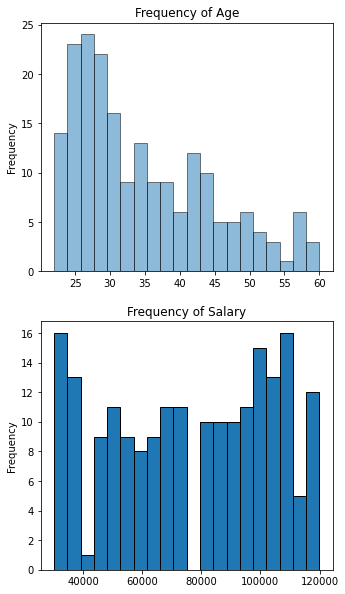

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.hist(hr['age'], bins=20, alpha=0.5, edgecolor = "black")
ax1.set_title("Frequency of Age")
ax1.set_ylabel('Frequency')

ax2.hist(hr['salary'], bins=20, alpha=1, edgecolor = "black")
ax2.set_title("Frequency of Salary")
ax2.set_ylabel('Frequency')
plt.subplots_adjust(bottom=0.1, right=0.8, top=2)

The age distribution is skewed to the left, meaning there are more employees in the 20's and 30's compared to all other ages. The salary distribution is pretty spread out. 

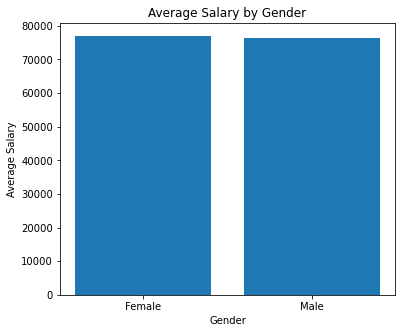

In [68]:
gender_salary_means = hr.groupby('gender')['salary'].mean().reset_index()
plot1 = plt.figure(figsize=(6, 5))
plot1 = plt.bar(gender_salary_means['gender'], gender_salary_means['salary'])
plot1 = plt.xlabel('Gender')
plot1 = plt.ylabel('Average Salary')
plot1 = plt.title('Average Salary by Gender')

The average salary is about the same between males and females in the company. Females have a slightly higher average. (If I knew how to add the mean to the plot I would have, sorry!)

Text(0.5, 1.0, 'Average Salary by Department')

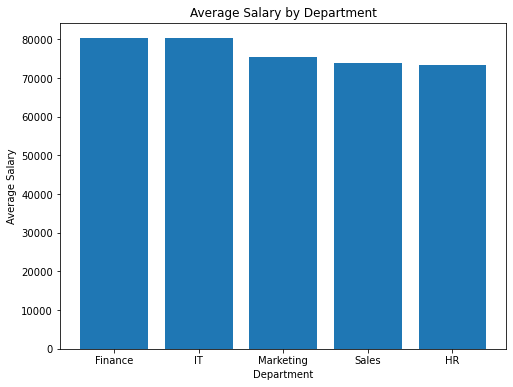

In [66]:
salary_dept_means = hr.groupby('department')['salary'].mean().reset_index()
salary_dept_means = salary_dept_means.sort_values('salary', ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(salary_dept_means['department'], salary_dept_means['salary'])
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')

Text(0.5, 1.0, 'Average Satisfaction by Department')

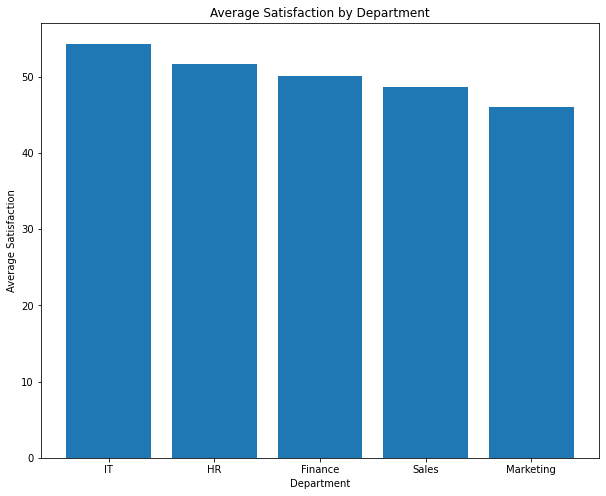

In [83]:
sat_dept_means = hr.groupby('department')['satisfaction'].mean().reset_index() 
sat_dept_means =  sat_dept_means.sort_values('satisfaction', ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(sat_dept_means['department'], sat_dept_means['satisfaction'])
plt.xlabel('Department')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Department')

The average salary of Finance and IT workers is higher than marketing, sales, and HR. They are not too far apart, however! Albeit close, the average satisfaction of IT emmployees is higher than other departments.

Text(0.5, 1.0, 'Average Salary by Position')

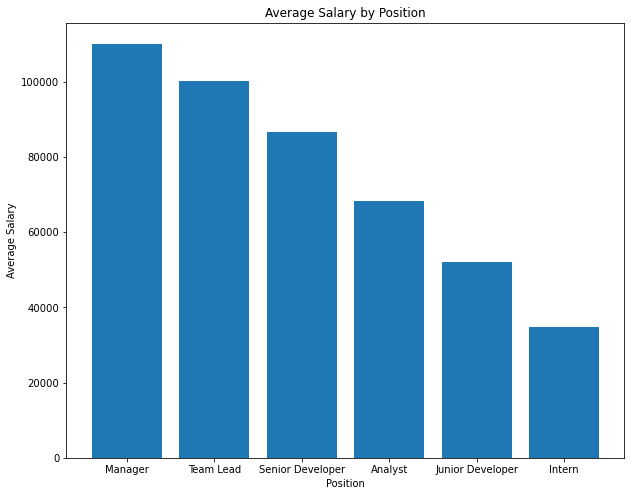

In [69]:
salary_pos_means = hr.groupby('position')['salary'].mean().reset_index()
salary_pos_means = salary_pos_means.sort_values('salary', ascending=False) ### orders barplot by average salary in descending order
plt.figure(figsize=(10, 8))
plt.bar(salary_pos_means['position'], salary_pos_means['salary'])
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Average Salary by Position')

The average salary between positions shows the hierarchy in the company. Managers make the most money while inters have a lower salary on average, which makes sense.

Text(0.5, 1.0, 'Average Satisfaction by Position')

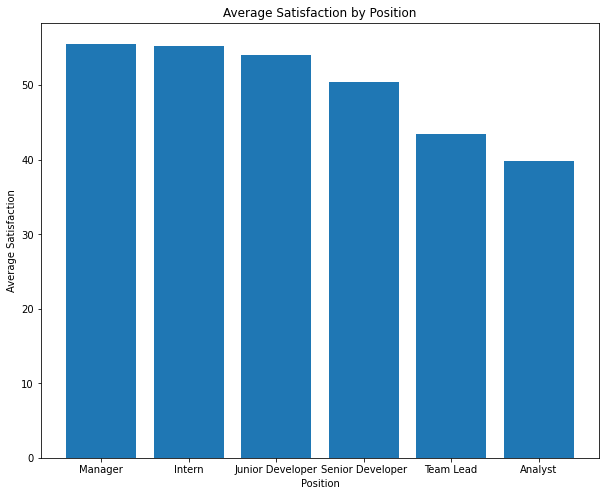

In [22]:
sat_pos_means = hr.groupby('position')['satisfaction'].mean().reset_index() 
sat_pos_means =  sat_pos_means.sort_values('satisfaction', ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(sat_pos_means['position'], sat_pos_means['satisfaction'])
plt.xlabel('Position')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Position')

## Data Exploration: Correlations
Next, let's try to identify any significant positive correlations between all variables (e.g higher salary = higher satisfaction, more projects completed = higher satisfaction, etc.)

Text(0.5, 1.0, 'Satisfaction by Age')

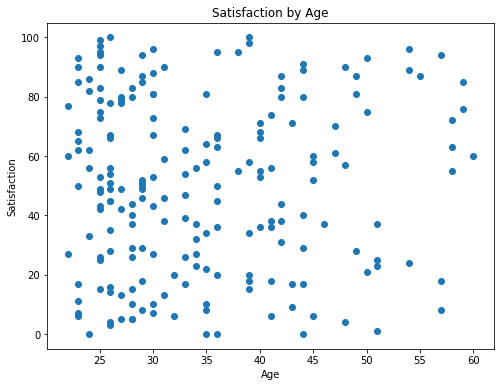

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['age'], hr['satisfaction'])
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.title('Satisfaction by Age')

Text(0.5, 1.0, 'Satisfaction by Salary')

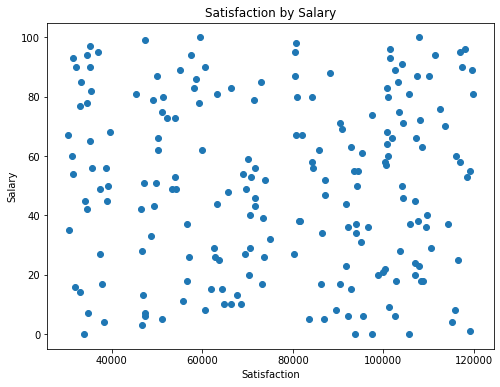

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['salary'], hr['satisfaction'])
plt.xlabel('Satisfaction')
plt.ylabel('Salary')
plt.title('Satisfaction by Salary')

Text(0.5, 1.0, 'Satisfaction by Years with the Company')

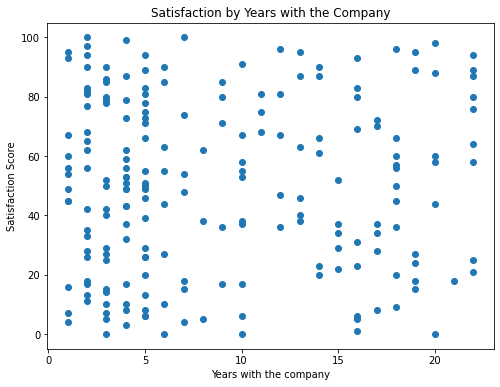

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['years with company'], hr['satisfaction'])
plt.xlabel('Years with the company')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction by Years with the Company')

For the last three scatter plots we can easily see that there's no correlation between age and satisfaction, salary and satisfaction, or satisfaction and years with the company. There doesn't seem to be a defining factor that leads to higher employee satisfaction.

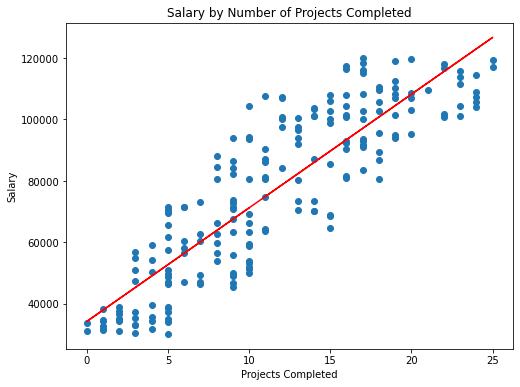

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['projects'], hr['salary'])
plt.xlabel('Projects Completed')
plt.ylabel('Salary')
plt.title('Salary by Number of Projects Completed')

## regression line
m, b = np.polyfit(hr['projects'], hr['salary'], 1)
plt.plot(hr['projects'], m*hr['projects'] + b, c='red')

However, there is a strong positive correlation between number of projects completed and salary. This sublty shows that the more project you complete, the more you get paid. 

## Correlations by years with the company

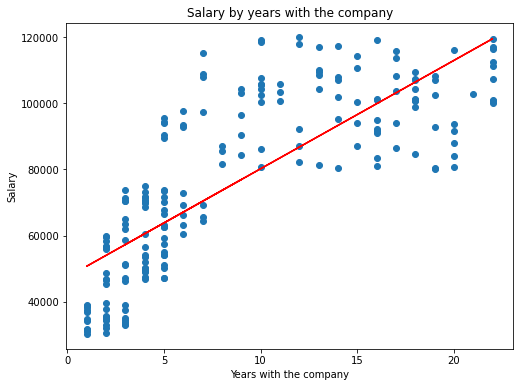

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['years with company'], hr['salary'])
plt.xlabel('Years with the company')
plt.ylabel('Salary')
plt.title('Salary by years with the company')

## regression line
m, b = np.polyfit(hr['years with company'], hr['salary'], 1)
plt.plot(hr['years with company'], m*hr['years with company'] + b, c='red')

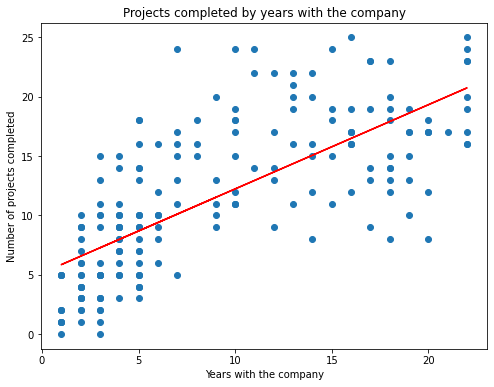

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(hr['years with company'], hr['projects'])
plt.xlabel('Years with the company')
plt.ylabel('Number of projects completed')
plt.title('Projects completed by years with the company')

## regression line
m, b = np.polyfit(hr['years with company'], hr['projects'], 1)
plt.plot(hr['years with company'], m*hr['years with company'] + b, c='red')

There are more positive correlations with the 'years with company' column. The employees who have been the company longer tend to have higher salaries and more projects completed. 

## Conclusions

Using the data set, we found out the average salaries and average satisfaction score between genders, departments within the company, and positions within the company. I could not find any correlations between satisfaction score of employees and any other attributes, meaning we're not sure what factors contribute to the satisfaction of employees. However, I did find positive correlations between salary & projects completed, years with the company & salary, as well as yeras with the company & projects completed. This makes perfect sense as the longer you've been with the company, the more projects you complete, and the higher salary you get. 